In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Ensure plots display properly in Jupyter Notebook
%matplotlib inline

# Load the data
file_path = r"C:\Users\user\Downloads\Data-&-Problem-Statement---Project----1 (5)\Credit Banking_Project - 1.xls"  # Replace with your actual file path
data = pd.read_excel(file_path)

# Display basic info and preview the data
print("Dataset Information:")
data.info()
print("\nSample Data:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB

Sample Data:
   Sl No: Customer        Age       City Credit Card Product   Limit Company  \
0       1       A1   0.928521  BANGALORE                Gold  500000      C1   
1       2       A2  35.534551   CALCUTTA              Silver  100000      C2   
2       3       A3  11.559307     COCHIN            Platimum

In [8]:
# Replace missing numerical values with the mean
num_cols = data.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# Replace missing categorical values with the mode
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Handle Age values < 18 by assigning directly
data['Age'] = data['Age'].apply(lambda x: max(x, 18))

In [10]:
# Example: Create placeholder columns if they don't exist
if 'Monthly Spend' not in data.columns:
    data['Monthly Spend'] = np.random.randint(1000, 10000, size=len(data))  # Placeholder logic
if 'Repayment Amount' not in data.columns:
    data['Repayment Amount'] = np.random.randint(500, 9000, size=len(data))  # Placeholder logic

# Calculate Due Amount
data['Due Amount'] = data['Monthly Spend'] - data['Repayment Amount']


In [11]:
# Calculate due amount
data['Due Amount'] = data['Monthly Spend'] - data['Repayment Amount']

# Add interest to due amounts
interest_rate = 0.029
data['Interest'] = data['Due Amount'].apply(lambda x: max(x, 0) * interest_rate)

# Calculate profit
data['Profit'] = data['Monthly Spend'] - data['Repayment Amount'] + data['Interest']

# Age groups
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)


C:\Users\user\AppData\Local\Temp\ipykernel_18860\926244819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Monthly Spend', data=segment_spending, palette='viridis')


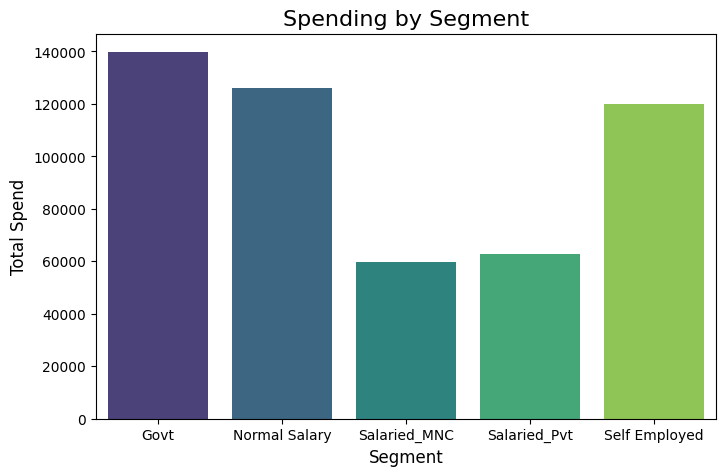

In [12]:
# Spending by segment
segment_spending = data.groupby('Segment')['Monthly Spend'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Monthly Spend', data=segment_spending, palette='viridis')
plt.title('Spending by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18860\2456812613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Monthly Spend', data=age_group_spending, hue=None, palette='magma')


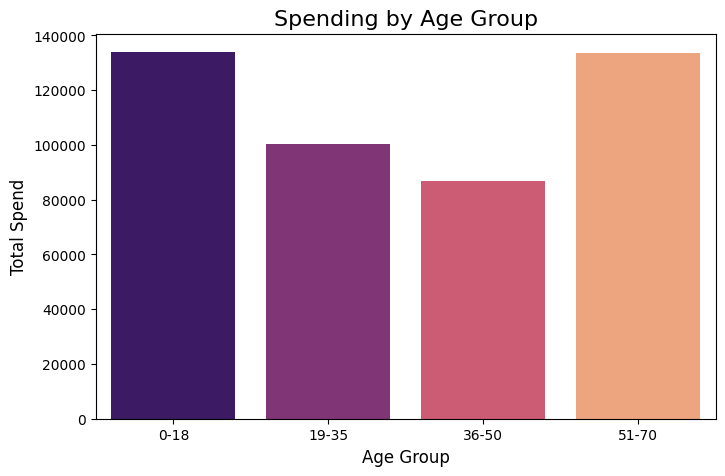

In [14]:
# Example Age Group and Monthly Spend for demonstration
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 70], labels=['0-18', '19-35', '36-50', '51-70'])

# Spending by age group
age_group_spending = data.groupby('Age Group', observed=True)['Monthly Spend'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Monthly Spend', data=age_group_spending, hue=None, palette='magma')
plt.title('Spending by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.legend([], [], frameon=False)  # Hide unnecessary legend
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18860\656477435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='coolwarm')


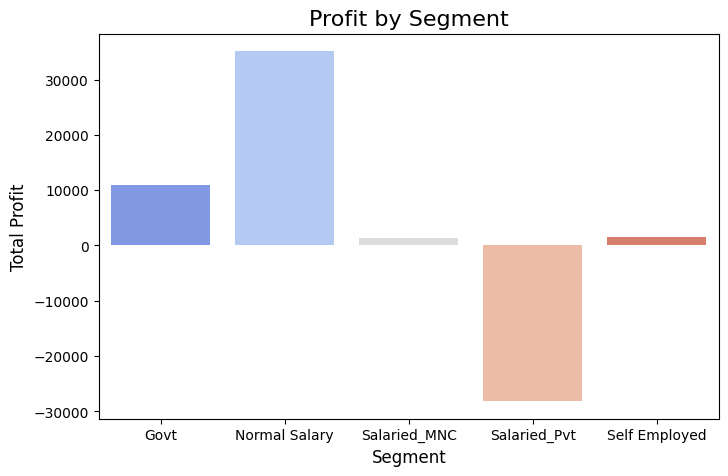

In [16]:
# Calculate total profit per segment
segment_profit = data.groupby('Segment')['Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Segment', y='Profit', data=segment_profit, palette='coolwarm')
plt.title('Profit by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.show()


Missing column: Credit Limit


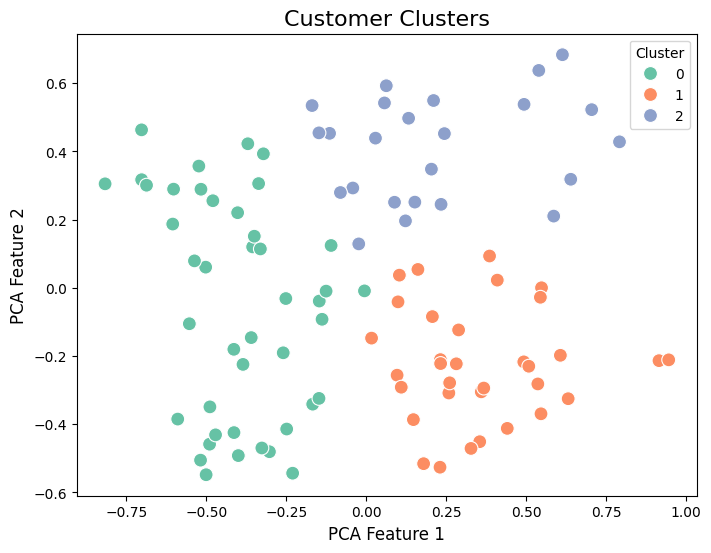

In [18]:
# Verify and preprocess columns
required_features = ['Age', 'Monthly Spend', 'Repayment Amount', 'Credit Limit', 'Due Amount']
for col in required_features:
    if col not in data.columns:
        print(f"Missing column: {col}")
        data[col] = 0  # Placeholder or derived logic for missing columns

# Scaling features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[required_features])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add clusters to the dataset
data['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters', fontsize=16)
plt.xlabel('PCA Feature 1', fontsize=12)
plt.ylabel('PCA Feature 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [24]:
months = ['January', 'February', 'March', 'April']  # Extend this list if needed
data['Month'] = [months[i % len(months)] for i in range(len(data))]


In [25]:
data['Month'] = ['Month ' + str(i + 1) for i in range(len(data))]


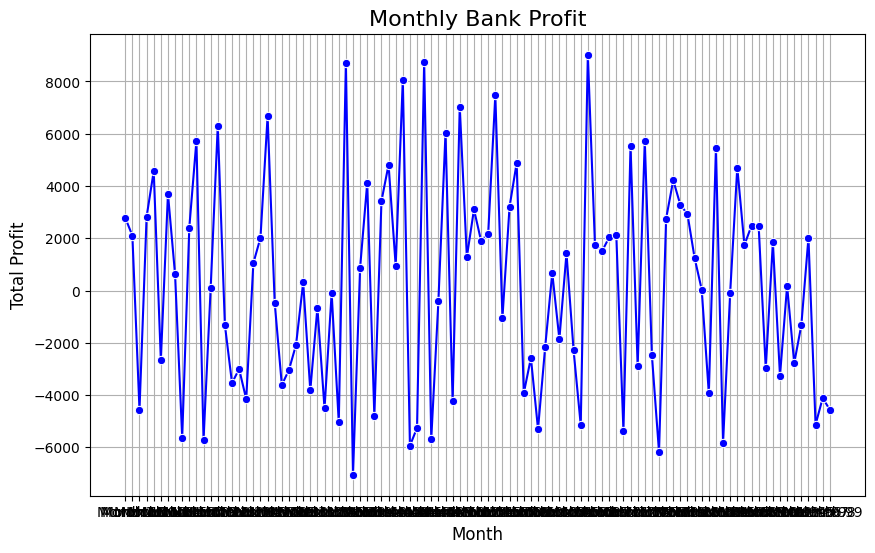

In [26]:
monthly_profit = data.groupby('Month')['Profit'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Profit', data=monthly_profit, marker='o', color='blue')
plt.title('Monthly Bank Profit', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18860\3707393783.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Repayment Amount', y='Customer', data=top_10_customers, palette='plasma')


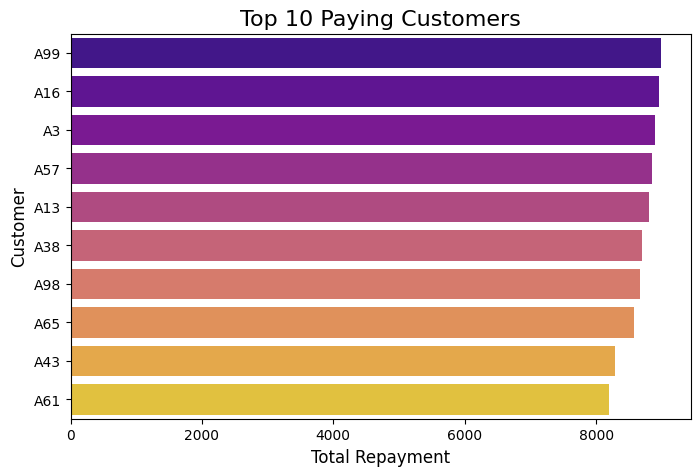

In [29]:
# Calculate total repayment per customer
customer_repayment = data.groupby('Customer')['Repayment Amount'].sum().reset_index()

# Get top 10 customers based on repayment amount
top_10_customers = customer_repayment.nlargest(10, 'Repayment Amount')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Repayment Amount', y='Customer', data=top_10_customers, palette='plasma')
plt.title('Top 10 Paying Customers', fontsize=16)
plt.xlabel('Total Repayment', fontsize=12)
plt.ylabel('Customer', fontsize=12)
plt.show()


